In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
import numpy as np
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features and labels
X, y = mnist['data'], mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9764285714285714

In [46]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [3]:
from PIL import Image
import pandas as pd

def predict_number(x: tuple) -> dict:
    pred_dict = {}
    for number in x:
        image = Image.open(f'number{number}.png')
    
        gray_image = image.convert('L')
        gray_array = np.array(gray_image)
        gray_array = gray_array.reshape(1, -1)
        gray_array = pd.DataFrame(gray_array)
        gray_array.columns = X_test.columns 
        pred = model.predict(gray_array)
        pred_proba = model.predict_proba(gray_array)
        pred_dict[number] = {'pred': pred, 'pred_proba': pred_proba}
    return pred_dict
        



In [10]:
pred_dict = predict_number((5,8))

In [11]:
pred_dict[5]

{'pred': array(['5'], dtype=object),
 'pred_proba': array([[2.95492026e-04, 1.38487919e-04, 6.66630805e-03, 7.46566859e-02,
         4.89901417e-03, 9.05255259e-01, 8.60099399e-04, 4.37648639e-04,
         1.49862122e-03, 5.29238373e-03]])}

In [12]:
pred_dict[8]['pred_proba']

array([[2.32484427e-04, 1.60615783e-04, 1.43493723e-03, 9.50376652e-01,
        4.06594637e-04, 3.29094566e-02, 7.26763811e-05, 1.31261312e-04,
        1.17684874e-02, 2.50683428e-03]])

<BarContainer object of 10 artists>

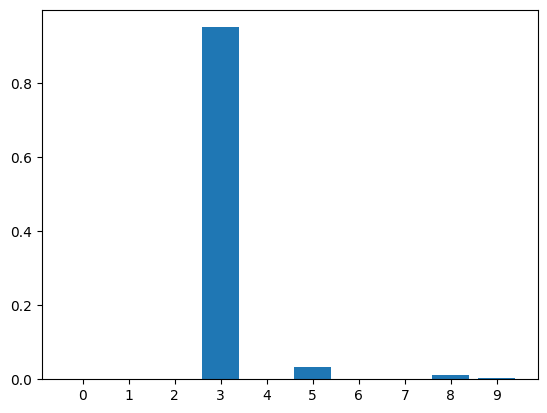

In [13]:
import matplotlib.pyplot as plt
plt.bar(range(10), pred_dict[8]['pred_proba'][0], tick_label=range(10))

In [14]:
def plot_preds(x: tuple):
    for number in x:
        plt.bar(range(10), pred_dict[number]['pred_proba'][0], tick_label=range(10))
        plt.title(f'Number {number}')
        plt.show()

    

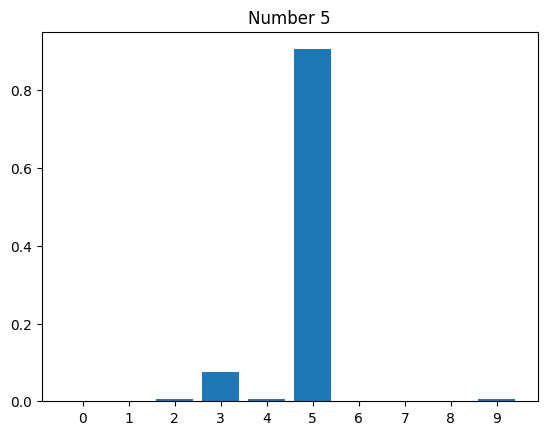

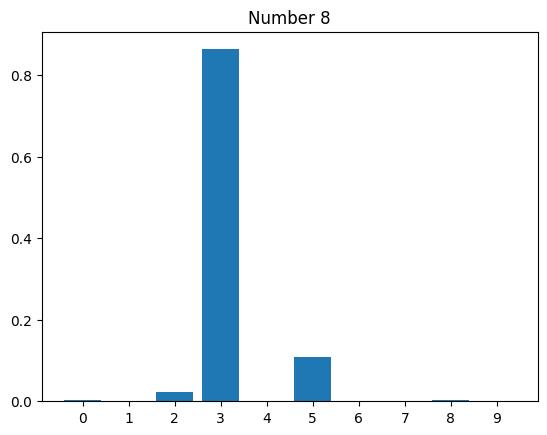

In [9]:
plot_preds((5,8))

In [69]:
from PIL import Image
image = Image.open('number8.png')
# Convert the image to grayscale (if it's not already)
image = image.convert('L')

# Invert the colors manually
inverted_image = Image.eval(image, lambda x: 255 - x)

# Save the inverted image with a different filename
inverted_image.save('inverted_number8.png')

In [15]:
import pickle 

with open('mnist_model.pkl', 'wb') as file:
    pickle.dump(model, file)